# Compare cross-validated models

## IPython magics

In [1]:
%matplotlib inline

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import titanic.tools as tools

from pprint import pprint
from titanic.modelling import ExtendedClassifier

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = -1

plt.rcParams['figure.figsize'] = [15, 4.5]

## Deserialize models

In [3]:
models = dict()
models['LogisticRegression'] = ExtendedClassifier.deserialize(r'../models/logreg.pickle')
models['RandomForestClassifier'] = ExtendedClassifier.deserialize(r'../models/forest.pickle')
models['SVC'] = ExtendedClassifier.deserialize(r'../models/svc.pickle')
models['VotingClassifier'] = ExtendedClassifier.deserialize(r'../models/voting.pickle')
models

{'LogisticRegression': ExtendedClassifier(clf=Pipeline(memory=None,
      steps=[('simpledataframeimputer', SimpleDataFrameImputer(median_cols=['Age', 'Fare'], mode_cols=['Embarked'])), ('dataframedummifier', DataFrameDummifier(get_dummies_kws={})), ('logisticregression', LogisticRegression(C=0.75, class_weight=None, dual=False, fit_intercep...y='l2', random_state=None, solver='liblinear',
           tol=0.0001, verbose=0, warm_start=False))])),
 'RandomForestClassifier': ExtendedClassifier(clf=Pipeline(memory=None,
      steps=[('categoricaltostring', CategoricalToString()), ('simpledataframeimputer', SimpleDataFrameImputer(median_cols=['Age', 'Fare'], mode_cols=['Embarked'])), ('ordinalencoder', OrdinalEncoder(cols=['Title', 'Deck', 'Embarked'], drop_invariant=False,
         handle_unknown='impute', impute_missing=...bs=None,
             oob_score=False, random_state=87216, verbose=0,
             warm_start=False))])),
 'SVC': ExtendedClassifier(clf=Pipeline(memory=None,
      ste

## Compare models

In [4]:
scores = {name: model.profile['cv_score'] for name, model in models.items()}
scores

{'LogisticRegression': 0.8215303496327915,
 'RandomForestClassifier': 0.8293766869625259,
 'SVC': 0.822635113928818,
 'VotingClassifier': 0.8282468143870441}

In [5]:
list(scores.keys())

['LogisticRegression', 'RandomForestClassifier', 'SVC', 'VotingClassifier']

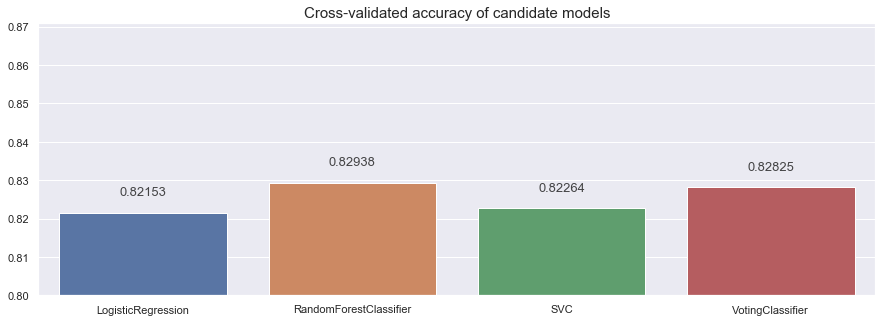

In [6]:
fig = plt.figure(figsize=[15, 5])
ax = fig.add_subplot(111)
sns.barplot(x=list(scores.keys()), y=list(scores.values()), orient='v', ax=ax)
ax.set_ylim(bottom=0.8)
ax.set_title('Cross-validated accuracy of candidate models', fontsize=15)
for p in ax.patches:
    ax.annotate("%.5f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=13, color='k', alpha=0.8,
                xytext=(0, 20), textcoords='offset points')
plt.show()

## Save as .py

In [7]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

In [8]:
# sdfgjlsdfglksdjg
!jupyter nbconvert --to script 02_compare_models.ipynb

[NbConvertApp] Converting notebook 02_compare_models.ipynb to script
[NbConvertApp] Writing 1803 bytes to 02_compare_models.py
